In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading the Dataset

In [19]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv' , delimiter  = ',')

X_test = np.loadtxt('input_test.csv', delimiter= ',')
Y_test = np.loadtxt('labels_test.csv', delimiter= ',')

# Reshaping and normalizing the dataset {Normalization done by dividing with 255}

In [20]:
X_train = X_train.reshape(len(X_train), 100 ,100 ,3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100 , 100 , 3)
Y_test = Y_test.reshape(len(Y_test),1)
X_train = X_train/255.0
X_test = X_test/255.0

In [21]:
print("Shape of X_train", X_train.shape)
print("Shape of Y_train", Y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of Y_test", Y_test.shape)

Shape of X_train (2000, 100, 100, 3)
Shape of Y_train (2000, 1)
Shape of X_test (400, 100, 100, 3)
Shape of Y_test (400, 1)


# Choosing a random image from the dataset

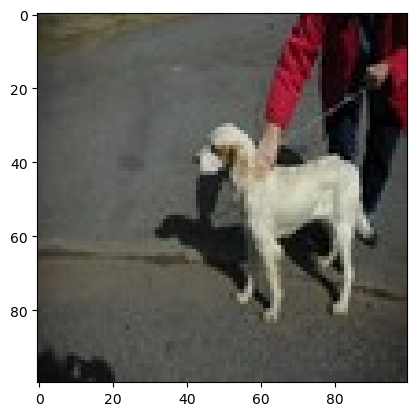

In [26]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [29]:
model = Sequential()
model.add(Conv2D(32, (3,3) , activation ='relu', input_shape = (100 , 100 ,3)))
model.add(MaxPooling2D((2,2))) 
model.add(Conv2D(32 , (3,3) ,activation ='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])

In [36]:
model.fit(X_train, Y_train, epochs=5 ,batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.9444 - loss: 0.1798
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.9634 - loss: 0.1065
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.9799 - loss: 0.0826
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.9884 - loss: 0.0563
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.9959 - loss: 0.0365


In [37]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6380 - loss: 1.3466


[1.1579103469848633, 0.6675000190734863]

# Making Predictions for individual image

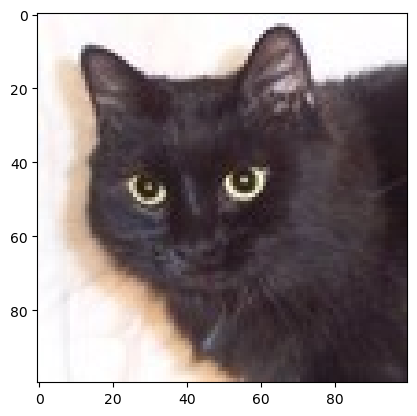

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.9997322]]
Our model says it is a : cat


In [45]:
idx2 = random.randint(0 , len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

Y_pred= model.predict(X_test[idx2, :].reshape(1 ,100, 100, 3))
print(Y_pred)
Y_pred = Y_pred > 0.5
if(Y_pred == 0):
    pred = 'dog'
else:
    pred= 'cat'

print("Our model says it is a :", pred)